In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
t,g,m1,m2,l1,l2 = sp.symbols(r't g m_1 m_2 l_1 l_2')

In [3]:
theta1, theta2 = sp.Function(r'theta_1')(t), sp.Function(r'theta_2')(t)

In [4]:
theta1d = sp.diff(theta1,t)
theta2d = sp.diff(theta2,t)

theta1dd = sp.diff(theta1d,t)
theta2dd = sp.diff(theta2d,t)

In [5]:
x1 = l1*sp.sin(theta1)
y1 = -l1*sp.cos(theta1)

x2 = x1 + l2*sp.sin(theta2)
y2 = y1 - l2*sp.cos(theta2)

In [6]:
x1_f = sp.lambdify((theta1,theta2,l1,l2), x1)
y1_f = sp.lambdify((theta1,theta2,l1,l2), y1)

x2_f = sp.lambdify((theta1,theta2,l1,l2), x2)
y2_f = sp.lambdify((theta1,theta2,l1,l2), y2)

In [7]:
# Kinetic Energy
T = (1/2)*m1*(sp.diff(x1,t)**2 + sp.diff(y1,t)**2) + (1/2)*m2*(sp.diff(x2,t)**2+sp.diff(y2,t)**2)
# Potential Energy
V = m1*g*y1 + m2*g*y2
# Lagrangian
L = T - V

In [8]:
Leq1 = sp.diff(sp.diff(L,theta1d),t) - sp.diff(L,theta1)
Leq2 = sp.diff(sp.diff(L,theta2d),t) - sp.diff(L,theta2)

In [9]:
sol = sp.solve([Leq1,Leq2],(theta1dd, theta2dd))

let,
* $o = \frac{d\theta_1}{dt} \implies \frac{do}{dt} = \frac{d^2\theta_1}{dt^2}$
* $\omega = \frac{d\theta_2}{dt} \implies \frac{d\omega}{dt} = \frac{d^2\theta_2}{dt^2}$

In [10]:
sp.solve(Leq1,theta1dd)[0]

-(g*m_1*sin(theta_1(t)) + g*m_2*sin(theta_1(t)) + l_2*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2 + l_2*m_2*cos(theta_1(t) - theta_2(t))*Derivative(theta_2(t), (t, 2)))/(l_1*(m_1 + m_2))

In [11]:
sol[theta1dd]

-g*m_1*sin(theta_1(t))*sin(theta_2(t))**2/(l_1*m_1*sin(theta_1(t))**2*sin(theta_2(t))**2 + l_1*m_1*sin(theta_1(t))**2*cos(theta_2(t))**2 + l_1*m_1*sin(theta_2(t))**2*cos(theta_1(t))**2 + l_1*m_1*cos(theta_1(t))**2*cos(theta_2(t))**2 + l_1*m_2*sin(theta_1(t))**2*cos(theta_2(t))**2 - 2.0*l_1*m_2*sin(theta_1(t))*sin(theta_2(t))*cos(theta_1(t))*cos(theta_2(t)) + l_1*m_2*sin(theta_2(t))**2*cos(theta_1(t))**2) - g*m_1*sin(theta_1(t))*cos(theta_2(t))**2/(l_1*m_1*sin(theta_1(t))**2*sin(theta_2(t))**2 + l_1*m_1*sin(theta_1(t))**2*cos(theta_2(t))**2 + l_1*m_1*sin(theta_2(t))**2*cos(theta_1(t))**2 + l_1*m_1*cos(theta_1(t))**2*cos(theta_2(t))**2 + l_1*m_2*sin(theta_1(t))**2*cos(theta_2(t))**2 - 2.0*l_1*m_2*sin(theta_1(t))*sin(theta_2(t))*cos(theta_1(t))*cos(theta_2(t)) + l_1*m_2*sin(theta_2(t))**2*cos(theta_1(t))**2) - g*m_2*sin(theta_1(t))*cos(theta_2(t))**2/(l_1*m_1*sin(theta_1(t))**2*sin(theta_2(t))**2 + l_1*m_1*sin(theta_1(t))**2*cos(theta_2(t))**2 + l_1*m_1*sin(theta_2(t))**2*cos(theta_1(t))*

In [12]:
theta1dd_f = sp.lambdify((theta1, theta2, theta1d, theta2d, l1, l2, m1, m2, g), sol[theta1dd])
theta2dd_f = sp.lambdify((theta1, theta2, theta1d, theta2d, l1, l2, m1, m2, g), sol[theta2dd])

In [16]:
def dSdt(S,t,l1,l2,m1,m2,g):
    theta1, theta2, o, w = S
    return [
        o,
        w,
        theta1dd_f(theta1, theta2, o, w, l1, l2, m1, m2, g),
        theta2dd_f(theta1, theta2, o, w, l1, l2, m1, m2, g)
    ]

In [17]:
l1 = 2
l2 = 2
m1 = 3
m2 = 2
g = 9.8
S0 = [2,1,1,1]
t = np.linspace(0,40,1001)
ans = odeint(dSdt,y0=S0 ,t=t, args=(l1,l2,m1,m2,g))

In [18]:
ans.shape

(1001, 4)

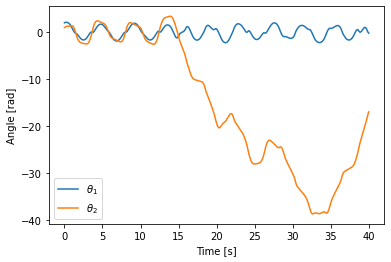

In [19]:
plt.plot(t, ans[:, 0], label=r'$\theta_1$')
plt.plot(t, ans[:, 1], label=r'$\theta_2$')
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.legend()
plt.show()

In [20]:
def get_pos():
    x_1 = x1_f(ans[:,0],ans[:,1],l1,l2)
    y_1 = y1_f(ans[:,0],ans[:,1],l1,l2)
    
    x_2 = x2_f(ans[:,0],ans[:,1],l1,l2)
    y_2 = y2_f(ans[:,0],ans[:,1],l1,l2)
    
    return np.array([x_1 , y_1, x_2, y_2])

In [21]:
get_pos()[0]

array([ 1.81859485,  1.78713821,  1.76007136, ..., -0.11003314,
       -0.26943779, -0.40217506])

In [22]:
np.save('D:\dataset\double_pendulum.npy',get_pos())